In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [152]:
from pylab import rcParams
rcParams['figure.figsize'] = 11,7

In [153]:
water = pd.read_csv('water.csv')
water.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


# Задание 1

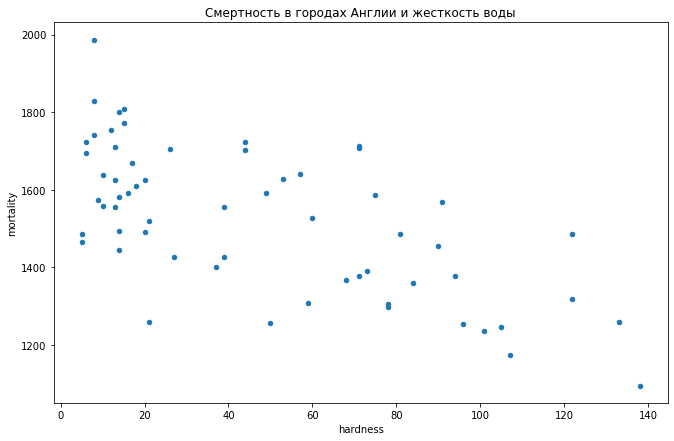

In [154]:
water.plot(kind = 'scatter',
           y = 'mortality',
           x = 'hardness',
           title= 'Смертность в городах Англии и жесткость воды'
)

In [155]:
water[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [156]:
water[['mortality', 'hardness']].corr(method = 'spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [157]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [158]:
x = water[['hardness']]
y = water['mortality']

In [159]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

The use of the number 42 as the random_state parameter in machine learning is actually a reference to the science fiction series "The Hitchhiker's Guide to the Galaxy" by Douglas Adams. In the series, the number 42 is famously referred to as the "Answer to the Ultimate Question of Life, the Universe, and Everything," though the actual question is unknown. It's a humorous and whimsical reference that has been embraced by the programming and data science community.

In [160]:
y_train.shape, x_train.shape

((42,), (42, 1))

In [161]:
model = LinearRegression()
model.fit(x_train, y_train)
model.coef_, model.intercept_

(array([-3.13167087]), 1668.9722977277095)

In [162]:
model.score(x_test, y_test)

0.5046490611017092

Неплохое значение R<sup>2</sup> - предсказательная сила модели в порядке

In [163]:
y_pred = model.predict(x_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [164]:
residuals = y_pred - y_test

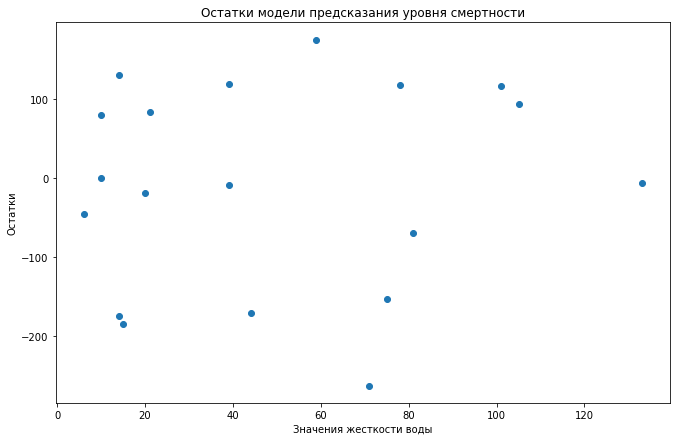

In [165]:
plt.scatter(x = x_test, y = residuals)

plt.title('Остатки модели предсказания уровня смертности')
plt.xlabel('Значения жесткости воды')
plt.ylabel('Остатки')
plt.show()

Остатки визуально не впечатляют

# Задание 2

In [166]:
water_north = water[water.location == 'North']
water_south = water[water.location == 'South']

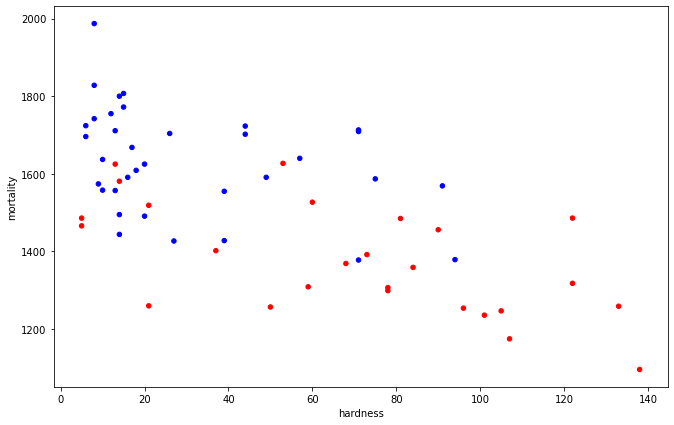

In [167]:
colors = {'North': 'blue', 'South': 'red'}
water.plot.scatter(x='hardness', y='mortality', c = water['location'].map(colors))

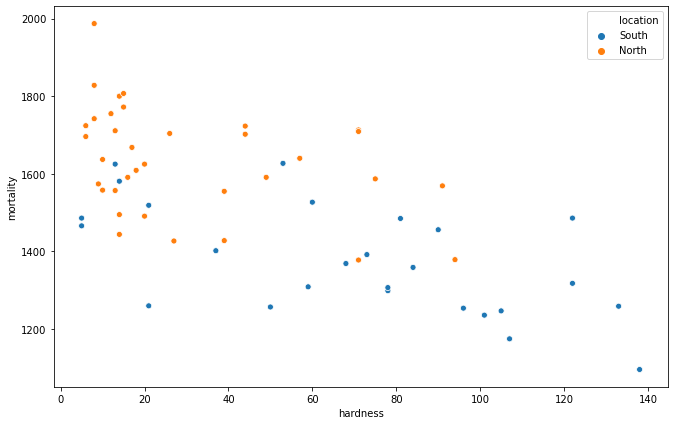

In [168]:
sns.scatterplot('hardness', 'mortality', data = water, hue = 'location')

In [169]:
water_north[['mortality', 'hardness']].corr(), water_south[['mortality', 'hardness']].corr()

(           mortality  hardness
 mortality   1.000000 -0.368598
 hardness   -0.368598  1.000000,
            mortality  hardness
 mortality   1.000000 -0.602153
 hardness   -0.602153  1.000000)

In [170]:
water_north[['mortality', 'hardness']].corr(method= 'spearman'), water_south[['mortality', 'hardness']].corr(method='spearman')

(           mortality  hardness
 mortality   1.000000 -0.404208
 hardness   -0.404208  1.000000,
            mortality  hardness
 mortality   1.000000 -0.595723
 hardness   -0.595723  1.000000)

Построим регрессию для северных городов

In [171]:
x = water_north[['hardness']]
y = water_north['mortality']

In [172]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [173]:
model = LinearRegression()
model.fit(x_train, y_train)
model.coef_, model.intercept_

(array([-1.97686226]), 1688.150229031281)

In [174]:
model.score(x_test, y_test)

0.018885304285745863

Очень плохой коэффициент детерминации - модель плохо сработала на тесте

In [175]:
y_pred = model.predict(x_test)
y_pred

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

In [176]:
residuals = y_pred - y_test

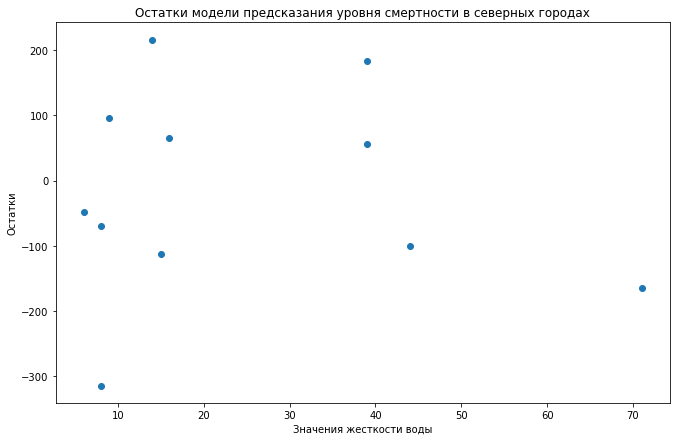

In [177]:
plt.scatter(x = x_test, y = residuals)

plt.title('Остатки модели предсказания уровня смертности в северных городах')
plt.xlabel('Значения жесткости воды')
plt.ylabel('Остатки')
plt.show()

Остатки визуально не сильно хуже, чем для полной выборки

А теперь для южных городов

In [178]:
x = water_south[['hardness']]
y = water_south['mortality']

In [179]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [180]:
model = LinearRegression()
model.fit(x_train, y_train)
model.coef_, model.intercept_

(array([-3.51342921]), 1640.2204603423374)

In [181]:
model.score(x_test, y_test)

-2.551922301235205

Просто отвратительный коэфицинет детерминации для южных городов. Можно попробовать иначе разбить выборку на обучающую и тестовую, но сильно лучше R<sup>2</sup> не станет

In [182]:
y_pred = model.predict(x_test)
y_pred

array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
       1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428])

In [183]:
residuals = y_pred - y_test

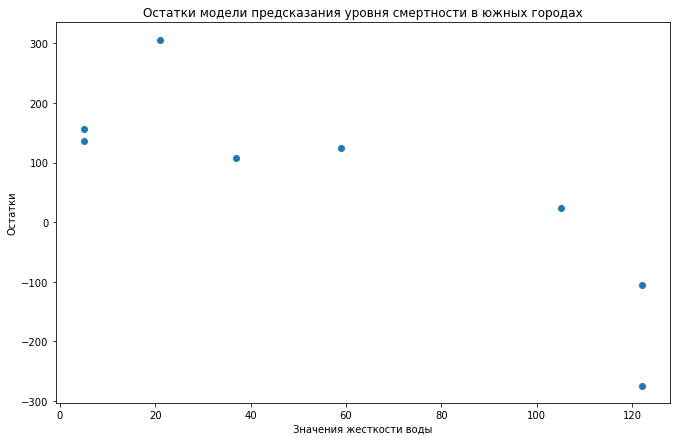

In [184]:
plt.scatter(x = x_test, y = residuals)

plt.title('Остатки модели предсказания уровня смертности в южных городах')
plt.xlabel('Значения жесткости воды')
plt.ylabel('Остатки')
plt.show()

Остатки довольно большие. Но хуже, что они как будто тоже имеют отрицательный наклон